In [18]:
import pandas as pd
import numpy as np
import matplotlib as mbl
import matplotlib.pyplot as plt
import os
import shutil


directories = ['data_exes_004/data', 'data_exes_0005/data']

check = True

for directory in directories:

    for filename in os.listdir(directory):

        f = os.path.join(directory, filename)
        
        if os.path.isfile(f):

            if check:

                columns = 'L TEMP SUM SUME SUME2 VARE SUMM SUMAM SUMM2 VARM DELTAE DELTAT'
                data = pd.read_csv(f, header = None, delim_whitespace=True, names = columns.split(' '))
                check = False

            else:

                new_data = pd.read_csv(f, header = None, delim_whitespace=True, names = columns.split(' '))
                data = pd.concat([data, new_data])


data = data.sort_values(by=['L','TEMP']).reset_index(drop = True)



data_matrix = np.array(data)

# empty = np.array([[]])
# with open("processed_data.txt", "ab") as f:

#     for L in range(12,84,12):
        
#         data_matrix_byL = data_matrix[data_matrix[:, 0] == L, :]
#         np.savetxt(f, data_matrix_byL)
#         np.savetxt(f, empty)
#         np.savetxt(f, empty)



In [19]:
import plotly.express as px

fig = px.scatter(data, x="TEMP", y="VARE")

# Show the plot
fig.show()

own_list=[2.330, 2.315, 2.300]

In [20]:

data['cv'] = (data['SUME2'] - data['SUME']**2)/((data['TEMP']*(data['L']))**2)
data['x'] = (data['SUMM2'] - data['SUMAM']**2)/(data['TEMP']*data['L']**2)

data['epsE'] = (np.sqrt(data['SUME2']-data['SUME']**2))/(np.sqrt(data['SUM'])*(data['L']**2))
data['epsM'] = (np.sqrt(data['SUMM2']-data['SUMM']**2))/(np.sqrt(data['SUM'])*(data['L']**2))



data.head()


,L,TEMP,SUM,SUME,SUME2,VARE,SUMM,SUMAM,SUMM2,VARM,DELTAE,DELTAT,cv,x,epsE,epsM
0,12,1.64,500000.0,-276.055968,76320.155456,113.257988,18.273216,140.565136,19770.803616,19436.893193,0.000000,0.04,0.292428,0.051855,0.000105,0.001369
1,12,1.68,500000.0,-274.295728,75370.506432,132.360033,5.607464,140.001640,19615.646192,19584.202539,1.760240,0.04,0.325669,0.062777,0.000113,0.001374
2,12,1.72,500000.0,-272.314928,74308.737472,153.317460,12.545600,139.357440,19439.301120,19281.909041,0.000000,0.04,0.359892,0.075925,0.000122,0.001364
3,12,1.76,500000.0,-270.154472,73160.243616,176.804874,2.535456,138.627096,19241.053776,19234.625239,2.160456,0.04,0.396375,0.093048,0.000131,0.001362
4,12,1.80,500000.0,-267.727424,71882.548096,204.574534,-7.372244,137.779916,19013.111720,18958.761738,0.000000,0.04,0.438474,0.114994,0.000140,0.001352


In [21]:
data.shape

(720, 16)

In [22]:
import statsmodels.api as sm

critical_df = pd.DataFrame([i for i in range(12,84,12)], columns=['L'])

critical_df['1/L'] = [1/i for i in range(12,84,12)]

inverseL_fitting = sm.add_constant(list(critical_df['1/L']))
L_fitting = sm.add_constant(list(critical_df['L']))


critical_df['Tcl_c'] = [2.335, 2.305, 2.290, 2.285, 2.280, 2.280]
critical_df['Tcl_x'] = [data['TEMP'].iloc[data.loc[data['L'] == i].x.idxmax()] for i in range(12,84,12)]

fit1 = sm.OLS(critical_df['Tcl_c'], inverseL_fitting).fit()
fit2 = sm.OLS(critical_df['Tcl_x'], inverseL_fitting).fit()

print(fit1.summary())
print(fit2.summary())

#from the fitting we get:

MyTc = (2.2681+2.2675)/2

DMy_Tc = np.sqrt(0.001**2+0.002**2)

print(MyTc)

print(DMy_Tc)


#############################################


critical_df['DTcl_c'] = [0.015, 0.01, 0.01, 0.005, 0.005, 0.005]
critical_df['DTcl_x'] = [0.03, 0.015, 0.01, 0.01, 0.01, 0.005]


critical_df['Tcl_c-Tc'] = critical_df['Tcl_c']-MyTc
critical_df['D(Tcl_c-Tc)'] = np.sqrt(critical_df['DTcl_c']**2+DMy_Tc**2)


critical_df['Tcl_x-Tc'] = critical_df['Tcl_x']-MyTc
critical_df['D(Tcl_x-Tc)'] = np.sqrt(critical_df['DTcl_x']**2+DMy_Tc**2)


critical_cv_index = [76, 190, 307, 426, 545, 665]
critical_df['cv'] = [data.iloc[critical_cv_index[i]].cv for i in range (6)]

critical_df['x'] = [data.x.iloc[data.loc[data['L'] == i].x.idxmax()] for i in range(12,84,12)]


critical_df['<|m|>x'] = [data.SUMAM.iloc[data.loc[data['L'] == i].x.idxmax()]/(i**2) for i in range(12,84,12)]
critical_df['<|m|>cv'] = [(data.iloc[critical_cv_index[i]]['SUMAM'])/((12*(i+1))**2) for i in range(6)]

critical_df




# L    1/L     TCL_C    TCL_X     DTCL_C    TCL_X     TCL_C-TC    D(TCL_C-TC)     TCL_X-TC    D(TCL_X-TC)       CV      X     |M|X     |X|CV

                            OLS Regression Results                            
Dep. Variable:                  Tcl_c   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     673.7
Date:                Fri, 30 Dec 2022   Prob (F-statistic):           1.31e-05
Time:                        18:15:29   Log-Likelihood:                 30.522
No. Observations:                   6   AIC:                            -57.04
Df Residuals:                       4   BIC:                            -57.46
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.2681      0.001   1741.371      0.0

c:\Users\ptbad\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 6 samples were given.

c:\Users\ptbad\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 6 samples were given.



,L,1/L,Tcl_c,Tcl_x,DTcl_c,DTcl_x,Tcl_c-Tc,D(Tcl_c-Tc),Tcl_x-Tc,D(Tcl_x-Tc),cv,x,<|m|>x,<|m|>cv
0,12,0.083333,2.335,2.440,0.015,0.030,0.0672,0.015166,0.1722,0.030083,1.403205,3.653469,0.544383,0.667696
1,24,0.041667,2.305,2.350,0.010,0.015,0.0372,0.010247,0.0822,0.015166,1.762681,12.495912,0.500261,0.601239
2,36,0.027778,2.290,2.325,0.010,0.010,0.0222,0.010247,0.0572,0.010247,1.954482,25.672626,0.466008,0.581604
3,48,0.020833,2.285,2.310,0.005,0.010,0.0172,0.005477,0.0422,0.010247,2.109669,42.268911,0.450088,0.559857
4,60,0.016667,2.280,2.305,0.005,0.010,0.0122,0.005477,0.0372,0.010247,2.214874,62.909660,0.418458,0.554970
5,72,0.013889,2.280,2.295,0.005,0.005,0.0122,0.005477,0.0272,0.005477,2.315603,86.337807,0.433527,0.528625


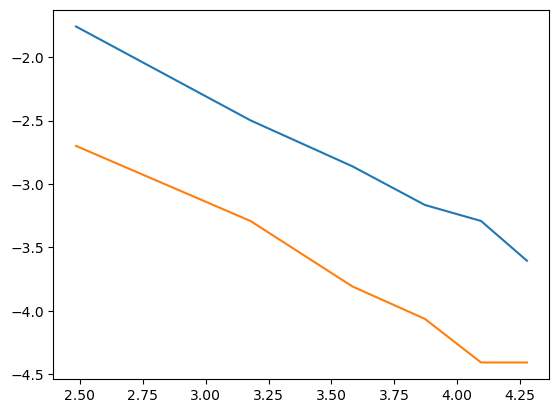

In [23]:

plt.plot(np.log(critical_df['L']), np.log(critical_df['Tcl_x-Tc']))
plt.plot(np.log(critical_df['L']), np.log(critical_df['Tcl_c-Tc']))


In [24]:
np.log(L_fitting)

array([[0.        , 2.48490665],
       [0.        , 3.17805383],
       [0.        , 3.58351894],
       [0.        , 3.87120101],
       [0.        , 4.09434456],
       [0.        , 4.27666612]])

In [25]:
log_inverseL_fitting = sm.add_constant(list(np.log(critical_df['1/L'])))
log_L_fitting = sm.add_constant(list(np.log(critical_df['L'])))

fit3 = sm.OLS(np.log(critical_df['Tcl_c-Tc']), log_L_fitting).fit()
fit4 = sm.OLS(np.log(critical_df['Tcl_x-Tc']), log_L_fitting).fit()

print(fit3.summary())
print(fit4.summary())


                            OLS Regression Results                            
Dep. Variable:               Tcl_c-Tc   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     351.2
Date:                Fri, 30 Dec 2022   Prob (F-statistic):           4.77e-05
Time:                        18:15:31   Log-Likelihood:                 7.8611
No. Observations:                   6   AIC:                            -11.72
Df Residuals:                       4   BIC:                            -12.14
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1578      0.196     -0.805      0.4

c:\Users\ptbad\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 6 samples were given.

c:\Users\ptbad\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 6 samples were given.



In [26]:
fit5 = sm.OLS(np.log(critical_df['x']), log_L_fitting).fit()

print(fit5.summary())

                            OLS Regression Results                            
Dep. Variable:                      x   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.086e+05
Date:                Fri, 30 Dec 2022   Prob (F-statistic):           6.30e-11
Time:                        18:15:32   Log-Likelihood:                 24.853
No. Observations:                   6   AIC:                            -45.71
Df Residuals:                       4   BIC:                            -46.12
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0874      0.012   -267.474      0.0

c:\Users\ptbad\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 6 samples were given.



In [27]:
fit6 = sm.OLS(np.log(critical_df['<|m|>x']), log_L_fitting).fit()

print(fit6.summary())

                            OLS Regression Results                            
Dep. Variable:                 <|m|>x   R-squared:                       0.955
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     85.37
Date:                Fri, 30 Dec 2022   Prob (F-statistic):           0.000763
Time:                        18:15:33   Log-Likelihood:                 15.342
No. Observations:                   6   AIC:                            -26.68
Df Residuals:                       4   BIC:                            -27.10
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2484      0.056     -4.411      0.0

c:\Users\ptbad\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 6 samples were given.



In [32]:
fit7 = sm.OLS(np.log(critical_df['cv']), log_L_fitting).fit()

print(fit7.summary())





                            OLS Regression Results                            
Dep. Variable:                     cv   R-squared:                       0.994
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     680.3
Date:                Fri, 30 Dec 2022   Prob (F-statistic):           1.28e-05
Time:                        18:20:59   Log-Likelihood:                 17.604
No. Observations:                   6   AIC:                            -31.21
Df Residuals:                       4   BIC:                            -31.62
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3342      0.039     -8.650      0.0

c:\Users\ptbad\anaconda3\lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning:

omni_normtest is not valid with less than 8 observations; 6 samples were given.



In [29]:
# critical_matrix = np.array(critical_df)

# empty = np.array([[]])
# with open("processed_data.txt", "ab") as f:
#     np.savetxt(f, critical_matrix)
#     np.savetxt(f, empty)
#     np.savetxt(f, empty)

